# 第二章 相关性分析

In [1]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
# import tensorflow as tf
# import keras
#import torch
# import catboost as cb
from pandas import read_csv
from math import sqrt
# from numpy import concatenate
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import Dropout
# from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# from keras.layers.core import Dense, Activation, Dropout
%matplotlib inline

In [2]:
print(os.getcwd()) # 打印当前工作目录

E:\Research Project\DKASC, Alice Springs


In [3]:
os.listdir(os.getcwd())

['.idea',
 '.ipynb_checkpoints',
 '101-Site_DKA-WeatherStation',
 '96-Site_DKA-MasterMeter1',
 'Alice_Springs_2016-2020',
 'CNN模型训练0809.ipynb',
 'Dataset',
 'logs',
 'picture',
 'Predict',
 'Program backups',
 'temp',
 'venv',
 '异常值检验.ipynb',
 '数据集_小波包分解重构数据.ipynb',
 '数据集_预处理_第二版0702.ipynb',
 '测试小波分解.ipynb',
 '测试模型0622.ipynb',
 '测试模型0704.ipynb',
 '测试模型0704批量.ipynb',
 '测试模型小波包分解0704批量.ipynb',
 '画图.ipynb',
 '画图0704.ipynb',
 '相关性分析.ipynb',
 '笔记.ipynb',
 '训练模型0622.ipynb',
 '训练模型0702.ipynb',
 '训练模型0703 WPD.ipynb']

In [4]:
os.chdir("./Alice_Springs_2016-2020/")

In [5]:
os.listdir()

['3D.jpg',
 'Alice_Springs_2016.csv',
 'Alice_Springs_2017.csv',
 'Alice_Springs_2018.csv',
 'Alice_Springs_2019.csv',
 'Alice_Springs_2020.csv']

In [6]:
dataset1 = pd.read_csv('Alice_Springs_2016.csv')
dataset2 = pd.read_csv('Alice_Springs_2017.csv')
dataset3 = pd.read_csv('Alice_Springs_2018.csv')
dataset4 = pd.read_csv('Alice_Springs_2019.csv')

In [7]:
#查看输入数据维度
print(dataset1.shape)
print(dataset2.shape)
print(dataset3.shape)
print(dataset4.shape)

(105462, 66)
(105155, 52)
(105229, 53)
(105321, 53)


In [8]:
# dataset = pd.concat([dataset1,dataset2,dataset3,dataset4],axis=0)

In [9]:
dataset = pd.concat([dataset1,dataset2,dataset3],axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [10]:
print(dataset.shape)

(315846, 70)


In [11]:
dataset = dataset[['Timestamp',
       'DKA.WeatherStation - Weather Temperature Celsius (°C)',
       'DKA.WeatherStation - Weather Relative Humidity (%)',
       'DKA.WeatherStation - Wind Speed (m/s)',
       'DKA.WeatherStation - Wind Direction (Degrees)',
       'DKA.WeatherStation - Weather Daily Rainfall (mm)',
       'DKA.WeatherStation - Global Horizontal Radiation (W/m²)',
       'DKA.WeatherStation - Diffuse Horizontal Radiation (W/m²)',
       'DKA.WeatherStation - Radiation Global Tilted (W/m²)',
       'DKA.WeatherStation - Radiation Diffuse Tilted (W/m²)',
       '1A Trina - Active Power (kW)',
       '1B Trina - Active Power (kW)', '2 eco-Kinetics - Active Power (kW)',
       '3 BP Solar - Active Power (kW)', '4 Kyocera - Active Power (kW)',
       '5 Kyocera - Active Power (kW)', '6 Kyocera - Active Power (kW)',
       '7 First Solar - Active Power (kW)', '8 Kaneka - Active Power (kW)',
       'DKA.MasterMeter1 - Active Power (kW)',
       'DKA.MasterMeter2 - Active Power (kW)']]
# print(dataset.head(5))

In [12]:
# dataset.head(2)

In [13]:
#电站和气象数据重命名
dataset.rename(columns={
       'DKA.WeatherStation - Weather Temperature Celsius (°C)':'Temperature(°C)',
       'DKA.WeatherStation - Weather Relative Humidity (%)':'Relative Humidity(%)',
       'DKA.WeatherStation - Wind Speed (m/s)':'Wind Speed(m/s)',
       'DKA.WeatherStation - Wind Direction (Degrees)':'Wind Direction(Degrees)',
       'DKA.WeatherStation - Weather Daily Rainfall (mm)':'Daily Rainfall(mm)',
       'DKA.WeatherStation - Global Horizontal Radiation (W/m²)':'Global Horizontal Radiation(W/m²)',
       'DKA.WeatherStation - Diffuse Horizontal Radiation (W/m²)':'Diffuse Horizontal Radiation(W/m²)',
       'DKA.WeatherStation - Radiation Global Tilted (W/m²)':'Radiation Global Tilted(W/m²)',
       'DKA.WeatherStation - Radiation Diffuse Tilted (W/m²)':'Radiation Diffuse Tilted(W/m²)',
       '1A Trina - Active Power (kW)':'1A Trina_power',
       '1B Trina - Active Power (kW)':'1B Trina_power',
       '2 eco-Kinetics - Active Power (kW)':'2 eco_power',
       '3 BP Solar - Active Power (kW)':'3 BP_power',
       '4 Kyocera - Active Power (kW)':'4 Kyocera_power',
       '5 Kyocera - Active Power (kW)':'5 Kyocera_power',
       '6 Kyocera - Active Power (kW)':'6 Kyocera_power',
       '7 First Solar - Active Power (kW)':'7 First_power',
       '8 Kaneka - Active Power (kW)':'8 Kaneka_power',
       'DKA.MasterMeter1 - Active Power (kW)':'DKA.Meter1_power',
       'DKA.MasterMeter2 - Active Power (kW)':'DKA.Meter2_power'},inplace=True)

# dataset.columns

In [14]:
strsplit = dataset.Timestamp.str.split(expand = True)
strsplit.rename(columns={0:'date',1:'time'},inplace=True)
date = strsplit.date.str.split(expand = True,pat='/')
date.rename(columns={0:'Year',1:'Month',2:'Day'},inplace=True)
time = strsplit.time.str.split(expand = True,pat=':')
#time.rename(columns = {0:'H',1:'M',2:'S'},inplace = True)
time.rename(columns = {0:'Hour',1:'Minutes'},inplace = True)
dataset = pd.concat([dataset,date,time],axis=1)
dataset.columns

Index(['Timestamp', 'Temperature(°C)', 'Relative Humidity(%)',
       'Wind Speed(m/s)', 'Wind Direction(Degrees)', 'Daily Rainfall(mm)',
       'Global Horizontal Radiation(W/m²)',
       'Diffuse Horizontal Radiation(W/m²)', 'Radiation Global Tilted(W/m²)',
       'Radiation Diffuse Tilted(W/m²)', '1A Trina_power', '1B Trina_power',
       '2 eco_power', '3 BP_power', '4 Kyocera_power', '5 Kyocera_power',
       '6 Kyocera_power', '7 First_power', '8 Kaneka_power',
       'DKA.Meter1_power', 'DKA.Meter2_power', 'Year', 'Month', 'Day', 'Hour',
       'Minutes'],
      dtype='object')

In [15]:
dataset.shape

(315846, 26)

In [16]:
# # #数据类型转换
dataset[['Year', 'Month','Day','Hour','Minutes']] = dataset[['Year', 'Month','Day','Hour','Minutes']].astype(int)
# test[['Year', 'Month','Day','Hour','Minutes']] = test[['Year', 'Month','Day','Hour','Minutes']].astype(int)

# #丢弃
dataset = dataset.drop(dataset[(dataset.Hour < 7) | (dataset.Hour > 18)].index)
# test = test.drop(test[(test.Hour < 7) | (test.Hour > 18)].index)


In [17]:
dataset = dataset.drop(['Timestamp','1A Trina_power', '1B Trina_power',
       '2 eco_power', '3 BP_power', '4 Kyocera_power', '5 Kyocera_power',
       '6 Kyocera_power', '7 First_power', '8 Kaneka_power'],axis=1)

In [18]:
dataset.shape

(117339, 16)

# 去空值

In [19]:
print('训练集初始维度：',dataset.shape)
dataset.dropna(axis="columns", how='all', inplace=True)  #删除掉训练集全是空值的列
dataset.dropna(axis="index", how='all', inplace=True)   #删除掉训练集全是空值的行
print('训练集去除全空维度：',dataset.shape)
# dataset

训练集初始维度： (117339, 16)
训练集去除全空维度： (117339, 16)


In [20]:
dataset.columns

Index(['Temperature(°C)', 'Relative Humidity(%)', 'Wind Speed(m/s)',
       'Wind Direction(Degrees)', 'Daily Rainfall(mm)',
       'Global Horizontal Radiation(W/m²)',
       'Diffuse Horizontal Radiation(W/m²)', 'Radiation Global Tilted(W/m²)',
       'Radiation Diffuse Tilted(W/m²)', 'DKA.Meter1_power',
       'DKA.Meter2_power', 'Year', 'Month', 'Day', 'Hour', 'Minutes'],
      dtype='object')

In [21]:
dataset.dropna(axis="index",thresh=13 , inplace=True)  #删除掉全是空值的行
dataset.dropna(axis="columns", how='all', inplace=True)  #删除掉全是空值的列

In [22]:
fillcolumns=dataset.columns
for i in fillcolumns:
    dataset[i] = dataset[i].fillna(method='ffill')
#     print("训练集",i,"列去掉全空")
    print(dataset.loc[dataset[i].isnull(),:])

Empty DataFrame
Columns: [Temperature(°C), Relative Humidity(%), Wind Speed(m/s), Wind Direction(Degrees), Daily Rainfall(mm), Global Horizontal Radiation(W/m²), Diffuse Horizontal Radiation(W/m²), Radiation Global Tilted(W/m²), Radiation Diffuse Tilted(W/m²), DKA.Meter1_power, DKA.Meter2_power, Year, Month, Day, Hour, Minutes]
Index: []
Empty DataFrame
Columns: [Temperature(°C), Relative Humidity(%), Wind Speed(m/s), Wind Direction(Degrees), Daily Rainfall(mm), Global Horizontal Radiation(W/m²), Diffuse Horizontal Radiation(W/m²), Radiation Global Tilted(W/m²), Radiation Diffuse Tilted(W/m²), DKA.Meter1_power, DKA.Meter2_power, Year, Month, Day, Hour, Minutes]
Index: []
Empty DataFrame
Columns: [Temperature(°C), Relative Humidity(%), Wind Speed(m/s), Wind Direction(Degrees), Daily Rainfall(mm), Global Horizontal Radiation(W/m²), Diffuse Horizontal Radiation(W/m²), Radiation Global Tilted(W/m²), Radiation Diffuse Tilted(W/m²), DKA.Meter1_power, DKA.Meter2_power, Year, Month, Day, Hour,

In [23]:
dataset.dropna(axis=0, how='any', inplace=True)

In [24]:
dataset.columns

Index(['Temperature(°C)', 'Relative Humidity(%)', 'Wind Speed(m/s)',
       'Wind Direction(Degrees)', 'Daily Rainfall(mm)',
       'Global Horizontal Radiation(W/m²)',
       'Diffuse Horizontal Radiation(W/m²)', 'Radiation Global Tilted(W/m²)',
       'Radiation Diffuse Tilted(W/m²)', 'DKA.Meter1_power',
       'DKA.Meter2_power', 'Year', 'Month', 'Day', 'Hour', 'Minutes'],
      dtype='object')

In [25]:
dataset.shape

(100170, 16)

In [26]:
datase = dataset.values
datase = dataset.astype('float32')     # 将整型变为float
scaler = MinMaxScaler(feature_range=(0, 1)) # 数据处理，归一化至0~1之间
datase = scaler.fit_transform(datase)

In [27]:
dataset.columns

Index(['Temperature(°C)', 'Relative Humidity(%)', 'Wind Speed(m/s)',
       'Wind Direction(Degrees)', 'Daily Rainfall(mm)',
       'Global Horizontal Radiation(W/m²)',
       'Diffuse Horizontal Radiation(W/m²)', 'Radiation Global Tilted(W/m²)',
       'Radiation Diffuse Tilted(W/m²)', 'DKA.Meter1_power',
       'DKA.Meter2_power', 'Year', 'Month', 'Day', 'Hour', 'Minutes'],
      dtype='object')

In [28]:
data=pd.DataFrame(datase)
data.columns = dataset.columns

In [29]:
data.head(5)

,Temperature(°C),Relative Humidity(%),Wind Speed(m/s),Wind Direction(Degrees),Daily Rainfall(mm),Global Horizontal Radiation(W/m²),Diffuse Horizontal Radiation(W/m²),Radiation Global Tilted(W/m²),Radiation Diffuse Tilted(W/m²),DKA.Meter1_power,DKA.Meter2_power,Year,Month,Day,Hour,Minutes
0,0.642399,0.394451,0.097046,0.623993,0.0,0.097410,0.031711,0.179446,0.041150,0.203345,0.131101,0.0,0.272727,0.0,0.000000,0.909091
1,0.652196,0.365132,0.097065,0.625243,0.0,0.109692,0.034513,0.197420,0.043052,0.230167,0.146283,0.0,0.272727,0.0,0.000000,1.000000
2,0.661849,0.317454,0.097122,0.625590,0.0,0.122090,0.037133,0.215904,0.046852,0.251232,0.161589,0.0,0.272727,0.0,0.090909,0.000000
3,0.672168,0.290724,0.097079,0.622299,0.0,0.134935,0.041056,0.235421,0.050617,0.270831,0.176803,0.0,0.272727,0.0,0.090909,0.090909
4,0.681624,0.268779,0.097138,0.518919,0.0,0.147536,0.043232,0.253440,0.053777,0.289692,0.192131,0.0,0.272727,0.0,0.090909,0.181818


In [30]:
data.shape

(100170, 16)

In [31]:
dataset.shape

(100170, 16)

In [32]:
data1= data.iloc[261:910,:]
data2= dataset.iloc[261:910,:]

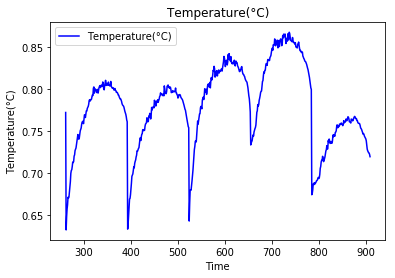

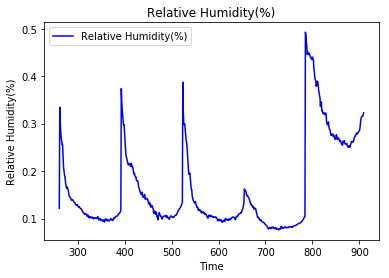

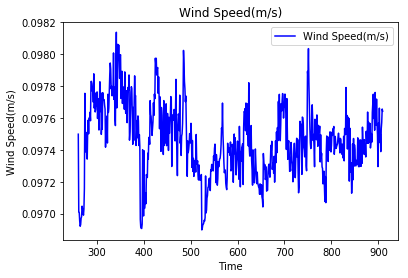

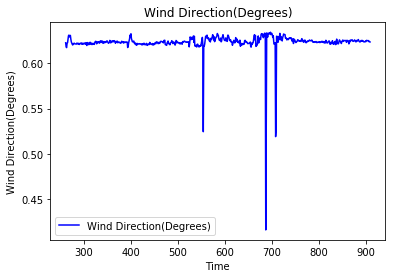

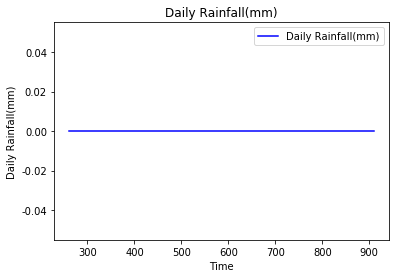

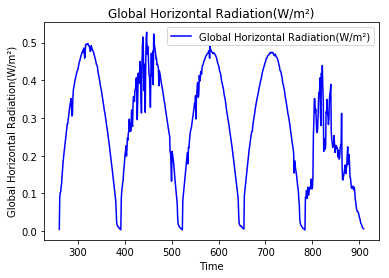

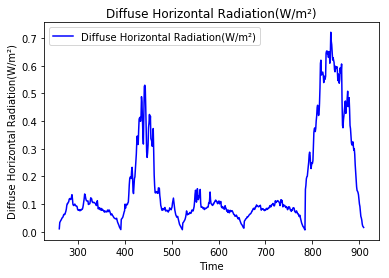

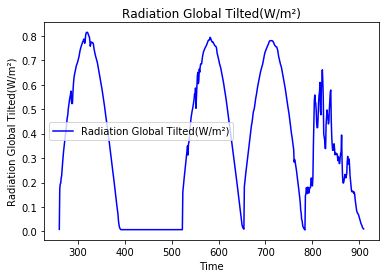

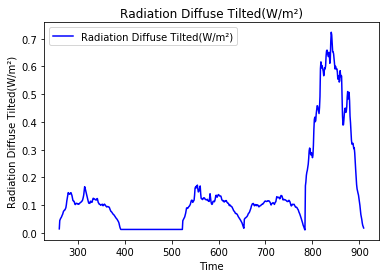

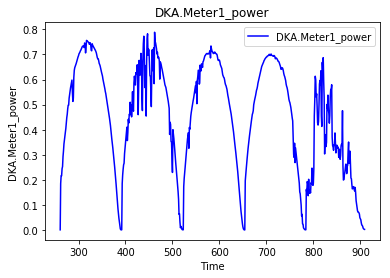

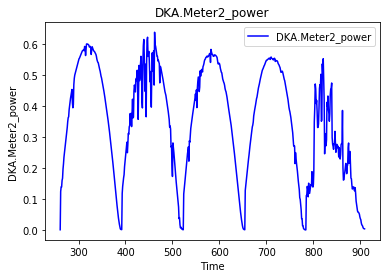

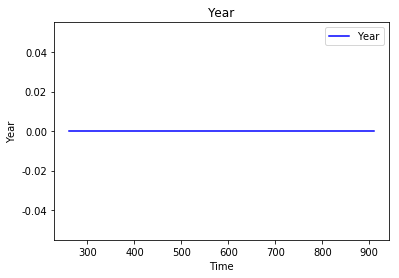

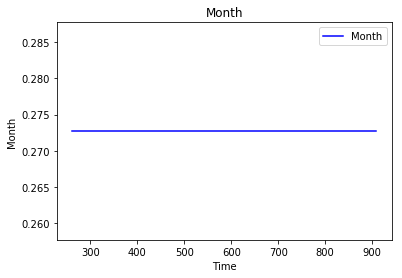

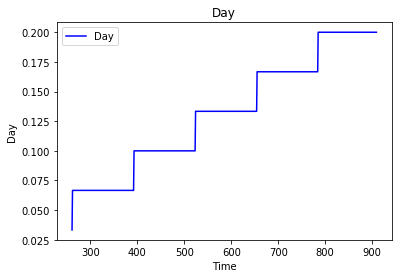

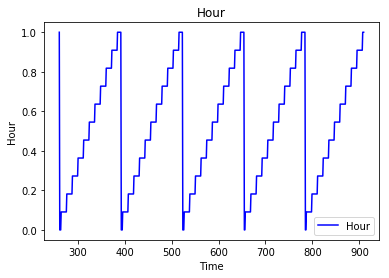

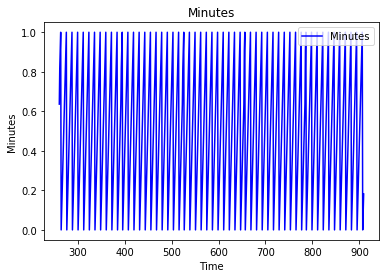

In [33]:
plotaa = list(data1.columns)
# plotaa.remove('Timestamp')
for i in plotaa:
    plt.figure()
    plt.plot(data1[i],'b',label= i)
    plt.title(i)
    plt.ylabel(i)
    plt.xlabel('Time')
    plt.legend()

In [34]:
data1.columns

Index(['Temperature(°C)', 'Relative Humidity(%)', 'Wind Speed(m/s)',
       'Wind Direction(Degrees)', 'Daily Rainfall(mm)',
       'Global Horizontal Radiation(W/m²)',
       'Diffuse Horizontal Radiation(W/m²)', 'Radiation Global Tilted(W/m²)',
       'Radiation Diffuse Tilted(W/m²)', 'DKA.Meter1_power',
       'DKA.Meter2_power', 'Year', 'Month', 'Day', 'Hour', 'Minutes'],
      dtype='object')

In [35]:
p=data1['DKA.Meter1_power']
t=data1['Temperature(°C)']
rh=data1['Relative Humidity(%)']
ws=data1['Wind Speed(m/s)']
wd=data1['Wind Direction(Degrees)']
dr=data1['Daily Rainfall(mm)']
ghr=data1['Global Horizontal Radiation(W/m²)']
dhr=data1['Diffuse Horizontal Radiation(W/m²)']
rgt=data1['Radiation Global Tilted(W/m²)']
rdt=data1['Radiation Diffuse Tilted(W/m²)']

In [36]:
p = p.values
t = t.values
rh = rh.values
ws=ws.values
wd=wd.values
dr=dr.values
ghr = ghr.values
dhr=dhr.values
rgt=rgt.values
rdt=rdt.values
# lstm_pr = lstm_pr.values

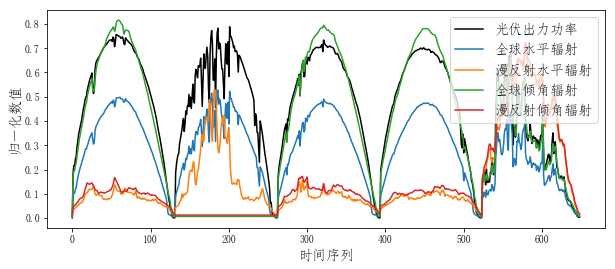

In [37]:
fig = plt.figure(figsize=(10,4))
# figsize=(20,6)
ax=fig.add_subplot(1,1,1)
# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['FangSong']  #SimHei黑体
plt.rcParams['axes.unicode_minus'] = False

plt.plot(p,label='光伏出力功率',c='black',linestyle='-')

plt.plot(ghr,label='全球水平辐射',linestyle='-')
plt.plot(dhr,label='漫反射水平辐射',linestyle='-')
plt.plot(rgt,label='全球倾角辐射',linestyle='-')
plt.plot(rdt,label='漫反射倾角辐射',linestyle='-')
# plt.plot(t,label='T',linestyle='--',marker = '+')
# plt.plot(bp_pr,label='BP模型',linestyle='-.')
# plt.plot(rdt,c='black',label='漫反射倾角辐射',linestyle=':')
# plt.plot(lstm_pr,label='小波包LSTM',linestyle='--')

# x_labels=ax.set_xticklabels(["one","two","three","four","five"],rotation=30,fontsize="10")
# x_labels=ax.set_xticklabels(['','9','10','','11','12','14','15','16','17','18'],fontsize="13")
# x_labels=ax.set_xticklabels(['','1','8','15','22','29'],fontsize="13")
# ax.set_xticks(['00:00','06:00','12:00','18:00'])
plt.ylabel('归一化数值',fontsize="14")
plt.xlabel('时间序列',fontsize="14")
# plt.xticks(['00:00','06:00','12:00','18:00'])
# my_x_ticks=np.arange(0,24,4)
# plt.xticks(my_x_ticks)
# plt.legend(['Train', 'Test'], loc='upper left')
plt.legend(loc=1,fontsize="14")
# plt.savefig('../picture/全辐射vs出力值.jpg',dpi=300)
# plt.savefig('../picture/全辐射vs出力值.svg',format="svg",dpi=300)

In [38]:
dataset.columns

Index(['Temperature(°C)', 'Relative Humidity(%)', 'Wind Speed(m/s)',
       'Wind Direction(Degrees)', 'Daily Rainfall(mm)',
       'Global Horizontal Radiation(W/m²)',
       'Diffuse Horizontal Radiation(W/m²)', 'Radiation Global Tilted(W/m²)',
       'Radiation Diffuse Tilted(W/m²)', 'DKA.Meter1_power',
       'DKA.Meter2_power', 'Year', 'Month', 'Day', 'Hour', 'Minutes'],
      dtype='object')

In [39]:
dataset = dataset.drop(['DKA.Meter2_power', 'Year', 'Month', 'Day', 'Hour', 'Minutes'],axis=1)

In [40]:
dataset.rename(columns={
       'Temperature(°C)':'温度',
       'Relative Humidity(%)':'湿度',
    'Wind Speed(m/s)':'风速',
       'Wind Direction(Degrees)':'风向', 
    'Daily Rainfall(mm)':'降水量',
       'Global Horizontal Radiation(W/m²)':'全球水平辐射',
       'Diffuse Horizontal Radiation(W/m²)':'漫反射水平辐射',
    'Radiation Global Tilted(W/m²)':'全球倾角辐射',
       'Radiation Diffuse Tilted(W/m²)':'漫反射倾角辐射', 
    'DKA.Meter1_power':'光伏发电功率',
    'Year':'年份',
    'Month':'月份', 'Day':'日期', 'Hour':'小时', 'Minutes':'分钟'},inplace=True)

In [41]:
dataset.head(3)

,温度,湿度,风速,风向,降水量,全球水平辐射,漫反射水平辐射,全球倾角辐射,漫反射倾角辐射,光伏发电功率
26306,18.630854,40.567207,1.189932,136.779663,0.0,196.298142,22.437895,257.538147,29.018410,45.594296
26307,19.524858,37.551815,1.280797,156.763489,0.0,221.048935,24.421011,283.304230,30.356417,51.772682
26308,20.405695,32.648415,1.549096,162.310577,0.0,246.033875,26.274761,309.801788,33.029137,56.625141


In [42]:
pearson=dataset.corr()

pearson = round(pearson,3)
pearson

,温度,湿度,风速,风向,降水量,全球水平辐射,漫反射水平辐射,全球倾角辐射,漫反射倾角辐射,光伏发电功率
温度,1.000,-0.363,0.079,0.282,-0.004,0.423,0.284,0.247,0.179,0.212
湿度,-0.363,1.000,-0.039,-0.044,0.315,-0.320,0.119,-0.365,0.081,-0.343
风速,0.079,-0.039,1.000,0.087,0.004,0.038,0.004,0.011,-0.014,0.005
风向,0.282,-0.044,0.087,1.000,0.051,0.025,0.100,-0.033,0.075,-0.053
降水量,-0.004,0.315,0.004,0.051,1.000,-0.080,0.147,-0.101,0.136,-0.100
全球水平辐射,0.423,-0.320,0.038,0.025,-0.080,1.000,0.203,0.923,0.144,0.930
漫反射水平辐射,0.284,0.119,0.004,0.100,0.147,0.203,1.000,0.119,0.947,0.079
全球倾角辐射,0.247,-0.365,0.011,-0.033,-0.101,0.923,0.119,1.000,0.126,0.956
漫反射倾角辐射,0.179,0.081,-0.014,0.075,0.136,0.144,0.947,0.126,1.000,0.067
光伏发电功率,0.212,-0.343,0.005,-0.053,-0.100,0.930,0.079,0.956,0.067,1.000


In [43]:
spearman = dataset.corr('spearman')
spearman

,温度,湿度,风速,风向,降水量,全球水平辐射,漫反射水平辐射,全球倾角辐射,漫反射倾角辐射,光伏发电功率
温度,1.000000,-0.481966,0.283898,0.383606,-0.007687,0.391716,0.427697,0.249811,0.315735,0.205874
湿度,-0.481966,1.000000,-0.125852,-0.051947,0.339874,-0.261855,0.045225,-0.302220,0.001211,-0.264062
风速,0.283898,-0.125852,1.000000,0.364115,0.049155,0.134870,0.091874,0.031240,0.004699,0.012963
风向,0.383606,-0.051947,0.364115,1.000000,0.108261,0.027873,0.143210,-0.058829,0.074395,-0.085410
降水量,-0.007687,0.339874,0.049155,0.108261,1.000000,-0.107162,0.193823,-0.154342,0.172598,-0.144332
全球水平辐射,0.391716,-0.261855,0.134870,0.027873,-0.107162,1.000000,0.451822,0.922656,0.380867,0.933491
漫反射水平辐射,0.427697,0.045225,0.091874,0.143210,0.193823,0.451822,1.000000,0.334740,0.913311,0.300084
全球倾角辐射,0.249811,-0.302220,0.031240,-0.058829,-0.154342,0.922656,0.334740,1.000000,0.356258,0.953167
漫反射倾角辐射,0.315735,0.001211,0.004699,0.074395,0.172598,0.380867,0.913311,0.356258,1.000000,0.299535
光伏发电功率,0.205874,-0.264062,0.012963,-0.085410,-0.144332,0.933491,0.300084,0.953167,0.299535,1.000000


In [44]:
pearson.head(3)

,温度,湿度,风速,风向,降水量,全球水平辐射,漫反射水平辐射,全球倾角辐射,漫反射倾角辐射,光伏发电功率
温度,1.000,-0.363,0.079,0.282,-0.004,0.423,0.284,0.247,0.179,0.212
湿度,-0.363,1.000,-0.039,-0.044,0.315,-0.320,0.119,-0.365,0.081,-0.343
风速,0.079,-0.039,1.000,0.087,0.004,0.038,0.004,0.011,-0.014,0.005


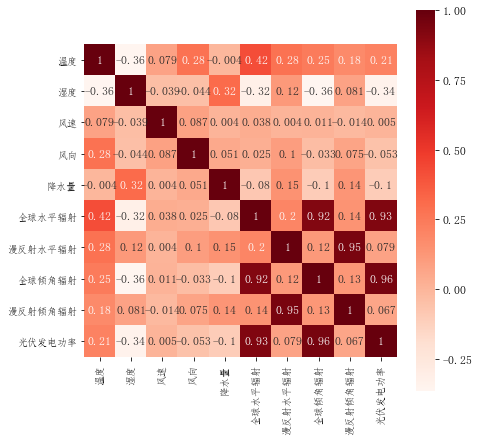

In [45]:
import seaborn as sns
# import matplotlib.pyplot as plt

plt.subplots(figsize=(7, 7))
# plt.rcParams['font.sans-serif']=['FangSong']  # 正常显示文字

plt.rc('font',family='FangSong',size=12)
# plt.rc('font',family='Times New Roman',size=11)
# plt.rcParams['axes.unicode_minus']=False      # 正常显示负号
sns.heatmap(round(pearson,3), annot=True, vmax=1, square=True, cmap="Reds",)
# plt.xlabel("pearson")
# plt.savefig('../picture/pearson.jpg',dpi=300)
plt.savefig('../picture/pearson.svg',format="svg",dpi=300)
plt.show()

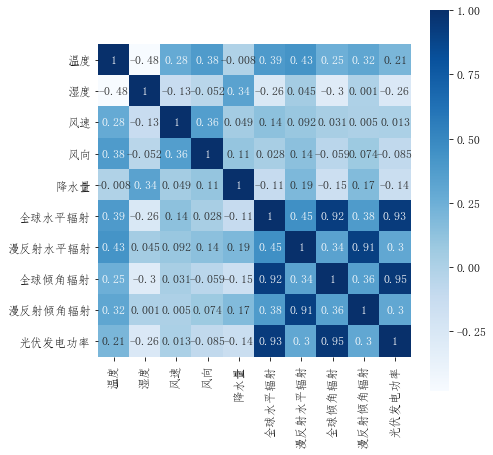

In [46]:
import seaborn as sns
# import matplotlib.pyplot as plt

plt.subplots(figsize=(7, 7))
plt.rcParams['font.sans-serif']=['FangSong']  # 正常显示文字

plt.rc('font',family='FangSong',size=12)
# plt.rc('font',family='Times New Roman',size=11)
# plt.rcParams['axes.unicode_minus']=False      # 正常显示负号
sns.heatmap(round(spearman,3), annot=True, vmax=1, square=True, cmap="Blues")
# plt.xlabel("spearman")
# plt.savefig('../picture/spearman.jpg',dpi=300)
plt.savefig('../picture/spearman.svg',format="svg",dpi=300)
plt.show()

In [ ]:
# # import pandas as pd
# # import numpy as np
# from sklearn.metrics import normalized_mutual_info_score

# # dataInit = pd.read_excel('dataProcess_Latest.xlsx',sheet_name='Sheet1', header=0)   # 从exccel导入数据
# dataInit = dataset
# dataProcess = dataInit.copy()                                                       # 数据备份
# disVar = ['Timestamp', 'Temperature(°C)', 'Relative Humidity(%)',
#        'Wind Speed(m/s)', 'Wind Direction(Degrees)', 'Daily Rainfall(mm)',
#        'Global Horizontal Radiation(W/m²)',
#        'Diffuse Horizontal Radiation(W/m²)', 'Radiation Global Tilted(W/m²)',
#        'Radiation Diffuse Tilted(W/m²)', '1A Trina_power', '1B Trina_power',
#        '2 eco_power', '3 BP_power', '4 Kyocera_power', '5 Kyocera_power',
#        '6 Kyocera_power', '7 First_power', '8 Kaneka_power',
#        'DKA.Meter1_power', 'DKA.Meter2_power', 'Year', 'Month', 'Day', 'Hour',
#        'Minutes']# 需要进行归一化互信息计算的变量名（excel中的列名）
# dataDis = dataProcess.loc[:,disVar]                  # 需要归一化互信息处理的数据提取
# [_, varLenDis] = dataDis.shape
# nmiMatrix = [[0 for col in range(varLenDis)] for row in range(varLenDis)]
# nmiMatrix = pd.DataFrame(nmiMatrix, columns=disVar, index=disVar)
# for i in range(varLenDis):
#     for j in range(varLenDis):
#         nmiMatrix.iloc[i,j] = normalized_mutual_info_score(dataDis[disVar[i]].values, dataDis[disVar[j]].values)
# print("**************离散变量相关性分析：互信息系数矩阵：*******************")
# print(nmiMatrix)

In [ ]:
# import seaborn as sns
# # import matplotlib.pyplot as plt

# plt.subplots(figsize=(10, 10))
# # plt.rcParams['font.sans-serif']=['FangSong']  # 正常显示文字
# # plt.rcParams['axes.unicode_minus']=False      # 正常显示负号
# sns.heatmap(round(nmiMatrix,2), annot=True, vmax=1, square=True, cmap="Greens")
# plt.xlabel("NMI")
# plt.savefig('../picture/NMI.jpg',dpi=300)
# plt.savefig('../picture/NMI.svg',format="svg",dpi=300)
# plt.show()

# K-means聚类分析

In [ ]:
dataset.columns

In [ ]:
from sklearn.cluster import KMeans
dataK = dataset[['温度', '湿度', '风速','风向','降水量']]
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(dataK) for i in n_cluster]
scores = [kmeans[i].score(dataK) for i in range(len(kmeans))]
  
fig, ax = plt.subplots(figsize=(7,4))
plt.rc('font',family='FangSong',size=12)
ax.plot(n_cluster, scores)
plt.xlabel('聚类集群数',fontsize=14)
plt.ylabel('分数',fontsize=14)
plt.title('Elbow 曲线',fontsize=14)
plt.savefig('../picture/Elbow 曲线.jpg',dpi=300)
plt.savefig('../picture/Elbow 曲线.svg',format="svg",dpi=300)
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3d
from mpl_toolkits.mplot3d import Axes3D
X = dataset[['温度', '湿度', '风速']]
X = X.reset_index(drop=True)
km = KMeans(n_clusters=10)
km.fit(X)
km.predict(X)
labels = km.labels_
  
fig = plt.figure(1, figsize=(7,6))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=25, azim=130)
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2],
          c=labels.astype(np.float), edgecolor="k")
ax.set_xlabel("温度", fontsize=14)
ax.set_ylabel("湿度", fontsize=14)
ax.set_zlabel("风速", fontsize=14)
# plt.title("K Means", fontsize=14)
# plt.savefig('../picture/气象异常值.jpg',dpi=300)
# plt.savefig('../picture/气象异常值.svg',format="svg",dpi=300)

In [ ]:
from sklearn.preprocessing import StandardScaler
dataK = dataset[['温度', '湿度', '风速']]
X = dataK.values
  
#标准化处理,均值为0,标准差为1
X_std = StandardScaler().fit_transform(X)
mean_vec = np.mean(X_std, axis=0)
#计算协方差
cov_mat = np.cov(X_std.T)
  
#计算特征值和特征向量
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
  
#每个特征值对应一组特征向量
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse= True)
  
#特征值求和
tot = sum(eig_vals)
  
#每个主要成分的解释方差
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)]
#累计的解释方差
cum_var_exp = np.cumsum(var_exp)
  
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3, align='center', label='独立的解释方差', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='累积解释方差')
plt.ylabel('解释方差率')
plt.xlabel('主成分')
plt.legend(loc='best')
plt.show();

In [ ]:
from sklearn.decomposition import PCA

dataK = dataset[['温度', '湿度', '风速']]
X = dataK.values
  
#标准化处理,均值为0,标准差为1
X_std = StandardScaler().fit_transform(X)
dataK = pd.DataFrame(X_std)
  
#将特征维度降到2
pca = PCA(n_components=2)
dataK = pca.fit_transform(dataK)
# 降维后将2个新特征进行标准化处理
scaler = StandardScaler()
np_scaled = scaler.fit_transform(dataK)
dataK = pd.DataFrame(np_scaled)
  
kmeans = [KMeans(n_clusters=i).fit(dataK) for i in n_cluster]
dataset['cluster'] = kmeans[9].predict(dataK)
dataset.index = dataK.index
dataset['principal_feature1'] = dataK[0]
dataset['principal_feature2'] = dataK[1]
dataset.head()

In [ ]:
# 计算每个数据点到其聚类中心的距离
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]]
        distance.set_value(i, np.linalg.norm(Xa-Xb))
    return distance
  
#设置异常值比例
outliers_fraction = 0.01
  
# 得到每个点到取聚类中心的距离，我们设置了10个聚类中心，kmeans[9]表示有10个聚类中心的模型
distance = getDistanceByPoint(dataset, kmeans[9])
  
#根据异常值比例outliers_fraction计算异常值的数量
number_of_outliers = int(outliers_fraction*len(distance))
  
#设定异常值的阈值
threshold = distance.nlargest(number_of_outliers).min()
  
#根据阈值来判断是否为异常值
dataset['anomaly1'] = (distance >= threshold).astype(int)
  
#数据可视化
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'blue', 1:'red'}
ax.scatter(dataset['principal_feature1'], dataset['principal_feature2'], c=dataset["anomaly1"].apply(lambda x: colors[x]))
plt.xlabel('principal feature1')
plt.ylabel('principal feature2')
plt.show();

In [ ]:
df = df.sort_values('date_time')
df['date_time_int'] = df.date_time.astype(np.int64)
fig, ax = plt.subplots(figsize=(12,6))
  
a = df.loc[df['anomaly1'] == 1, ['date_time_int', 'price_usd']] #anomaly
  
ax.plot(df['date_time_int'], df['price_usd'], color='blue', label='正常值')
ax.scatter(a['date_time_int'],a['price_usd'], color='red', label='异常值')
plt.xlabel('Date Time Integer')
plt.ylabel('价格(美元)')
plt.legend()
plt.show()

# 孤立森林

In [ ]:
dataset.head(100)

In [ ]:
dataset=dataset.drop(['anomaly2'],axis=1)
dataset.head(2)

In [ ]:
from sklearn.ensemble import IsolationForest
dataiso = dataset[['温度', '湿度', '风速']]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(dataiso)
dataiso = pd.DataFrame(np_scaled)
# 训练孤立森林模型
model =  IsolationForest(contamination=0.1)
model.fit(dataiso)
  
#返回1表示正常值，-1表示异常值
dataset['anomaly2'] = pd.Series(model.predict(dataiso))
  
fig, ax = plt.subplots(figsize=(10,6))
a = dataset.loc[dataset['anomaly2'] == -1, [ '温度']] #异常值
ax.plot(dataset['温度'], color='blue', label = '正常值')
ax.scatter(a['温度'], color='red', label = '异常值')
plt.legend()
plt.show();

# 离群值检验

In [ ]:
def localoutlierfactor(data, predict, k):
    from sklearn.neighbors import LocalOutlierFactor
    clf = LocalOutlierFactor(n_neighbors=k + 1, algorithm='auto', contamination=0.1, n_jobs=-1)
    clf.fit(data)
    # 记录 k 邻域距离
    predict['k distances'] = clf.kneighbors(predict)[0].max(axis=1)
    # 记录 LOF 离群因子，做相反数处理
    predict['local outlier factor'] = -clf._decision_function(predict.iloc[:, :-1])
    return predict

def plot_lof(result, method):
    import matplotlib.pyplot as plt
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
    plt.figure(figsize=(8, 4)).add_subplot(111)
    plt.scatter(result[result['local outlier factor'] > method].index,
                result[result['local outlier factor'] > method]['local outlier factor'], c='red', s=50,
                marker='.', alpha=None,
                label='离群点')
    plt.scatter(result[result['local outlier factor'] <= method].index,
                result[result['local outlier factor'] <= method]['local outlier factor'], c='black', s=50,
                marker='.', alpha=None, label='正常点')
    plt.hlines(method, -2, 2 + max(result.index), linestyles='--')
    plt.xlim(-2, 2 + max(result.index))
    plt.title('LOF局部离群点检测', fontsize=13)
    plt.ylabel('局部离群因子', fontsize=15)
    plt.legend()
    plt.show()

def lof(data, predict=None, k=5, method=1, plot=False):
    import pandas as pd
    # 判断是否传入测试数据，若没有传入则测试数据赋值为训练数据
    try:
        if predict == None:
            predict = data.copy()
    except Exception:
        pass
    predict = pd.DataFrame(predict)
    # 计算 LOF 离群因子
    predict = localoutlierfactor(data, predict, k)
    if plot == True:
        plot_lof(predict, method)
    # 根据阈值划分离群点与正常点
    outliers = predict[predict['local outlier factor'] > method].sort_values(by='local outlier factor')
    inliers = predict[predict['local outlier factor'] <= method].sort_values(by='local outlier factor')
    return outliers, inliers

In [ ]:
GHR = np.array(dataset['Global Horizontal Radiation(W/m²)'][:])  # 经度
Power = np.array(dataset['DKA.Meter2_power'][:])  # 纬度
A = list(zip(GHR, Power))  # 按照纬度-经度匹配

In [ ]:
outliers1, inliers1 = lof(A, k=5, method = 2)

In [ ]:
outliers1

In [ ]:
import matplotlib.pyplot as plt
for k in [3,5,10]:
    plt.figure('k=%d'%k)
    outliers1, inliers1 = lof(A, k=k, method = 2)
    plt.scatter(np.array(A)[:,0],np.array(A)[:,1],s = 10,c='b',alpha = 0.5)
    plt.scatter(outliers1[0],outliers1[1],s = 10+outliers1['local outlier factor']*100,c='r',alpha = 0.2)
    plt.title('k=%d' % k)